# 数据集介绍

Airbnb 中文名 爱彼迎  爱彼迎是一家联系旅游人士和家有空房出租的房主的服务型网站，它可以为用户提供多样的住宿信息。 

reviews.scv reviews_detailed.csv是评论信息 这里我们只用reviews_detailed 信息更多

calendar.csv 时间价格相关的信息

listings.csv  listings_detailed.csv 入住的信息

In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# calendar数据集分析

In [118]:
calendar = pd.read_csv("./data/madrid-airbnb-data/calendar.csv")
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,336834,2019-09-19,f,$63.00,$63.00,5,250
1,6369,2019-09-19,f,$70.00,$70.00,1,365
2,6369,2019-09-20,f,$75.00,$75.00,1,365
3,6369,2019-09-21,f,$75.00,$75.00,1,365
4,6369,2019-09-22,t,$70.00,$70.00,1,365


## 对价格调整——去除特殊字符，使其变成数值型

In [119]:
# $符号去掉才能够转化为数字类型。 除了'$'符号实际上还有逗号','  
# "[$,]",     '$'与','替换为空字符串""
# 但是这样不能识别出是正则，只会当成普通字符串，加上regex=True 就会当成正则

In [120]:
# r 表示原生py字符串
calendar['price'] = calendar['price'].str.replace(r"[$,]","",regex=True).astype(np.float32)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(r"[$,]","",regex=True).astype(np.float32) #默认是64

## 对日期的调整——转化为日期格式(datetime 格式)

In [121]:
calendar['date'] = pd.to_datetime(calendar['date']) #直接加载是字符串 现在我们要转化为datetime类型
calendar['date'].head()

0   2019-09-19
1   2019-09-19
2   2019-09-20
3   2019-09-21
4   2019-09-22
Name: date, dtype: datetime64[ns]

In [122]:
#calendar['date'].dt.year
calendar['date'].dt.weekday+1 # dt表示datetime类型，weekday从0开始，所以要加1

0          4
1          4
2          5
3          6
4          7
          ..
7605500    7
7605501    1
7605502    2
7605503    3
7605504    4
Name: date, Length: 7605505, dtype: int64

## 添加两个属性——星期与月份

In [123]:
calendar['weekday'] = calendar['date'].dt.weekday+1
calendar['month'] = calendar['date'].dt.month
calendar['month'].head()

0    9
1    9
2    9
3    9
4    9
Name: month, dtype: int64

## 价格与月份有什么样的改变

根据月份分组，分完组求平均值

In [124]:
month_prices = calendar.groupby("month")['price'].mean()
month_prices.head()
# 索引就是月份，右边是每个月平均价格

month
1    179.677155
2    181.085388
3    202.500778
4    214.366776
5    218.506042
Name: price, dtype: float32

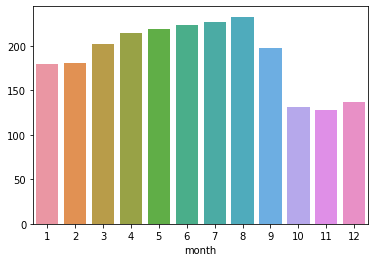

In [125]:
sns.barplot(month_prices.index,month_prices.values)
#sns.barplot(x=list(range(1,13)),y=month_prices)

## 星期几与价格的关系

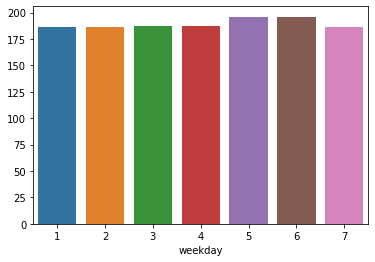

In [126]:
weekday_prices = calendar.groupby('weekday')['price'].mean()
sns.barplot(weekday_prices.index,weekday_prices.values)
#sns.barplot(x=list(range(1,8)),y=weekday_prices)

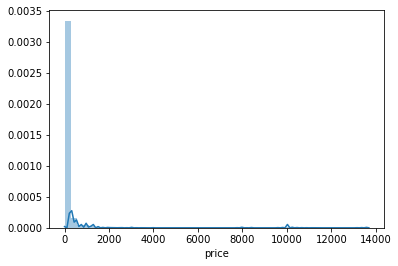

In [127]:
sns.distplot(calendar['price'])

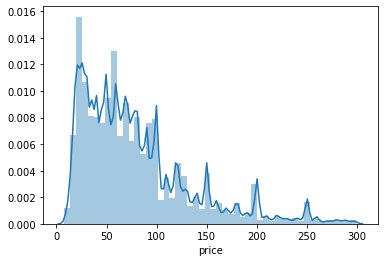

In [128]:
sns.distplot(calendar[calendar['price']<300]['price'])

# listings数据集分析

listing_url' 房子详情页

host_id',  房东ID

host_url'  房东URL

street 街道

neighbourhood 社区

city 城市

room_type 房间类型

latitude 经度

longitude 纬度

price 价格

cleaning_fee 小费

In [129]:
listings_detailed = pd.read_csv("./data/madrid-airbnb-data/listings_detailed.csv")# 106列
listings_detailed.head()

C:\Users\auniceo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190919050215,2019-09-19,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,...,f,f,flexible,f,f,1,0,1,0,0.56
1,21853,https://www.airbnb.com/rooms/21853,20190919050215,2019-09-19,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.55
2,24805,https://www.airbnb.com/rooms/24805,20190919050215,2019-09-19,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, next t...",none,"The area is next to the Gran Via, so people li...",...,f,f,moderate,f,f,1,1,0,0,0.03
3,24836,https://www.airbnb.com/rooms/24836,20190919050215,2019-09-19,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,"Cosmopolita, lleno de locales de moda, restaur...",...,f,f,moderate,f,f,1,1,0,0,0.63
4,26825,https://www.airbnb.com/rooms/26825,20190919050215,2019-09-19,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,none,"Es un barrio muy tranquilo, en una zona de Mad...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,1.19


In [130]:
listings_detailed.columns.values.tolist() #因为列无法全部显示完，所以转化为列表打印出来

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


## 处理数据

In [131]:
listings_detailed['price'] = listings_detailed['price'].str.replace(r"[$,]","").astype(np.float32)
listings_detailed['cleaning_fee'] = listings_detailed['cleaning_fee'].str.replace(r"[$,]","").astype(np.float32).fillna(0) 
# fillna(0)  小费存在nan的值 用0代替

In [132]:
listings_detailed['cleaning_fee'].head()

0     5.0
1     0.0
2    30.0
3     0.0
4    15.0
Name: cleaning_fee, dtype: float32

## 添加新的字段

### 入住最低消费 价格加小费*入住的最少天数

In [133]:
listings_detailed['minimum_cost'] = (listings_detailed['price']+listings_detailed['cleaning_fee'])*listings_detailed['minimum_nights']
listings_detailed['minimum_cost'].head()

0     75.0
1     68.0
2    550.0
3    345.0
4     80.0
Name: minimum_cost, dtype: float32

### 入住每晚最低消费

In [134]:
listings_detailed['minimum_cost_per_night'] = listings_detailed['minimum_cost'] / listings_detailed['minimum_nights']
listings_detailed['minimum_cost_per_night'].head()

0     75.0
1     17.0
2    110.0
3    115.0
4     40.0
Name: minimum_cost_per_night, dtype: float32

### 设施的数量 

amenities 设施信息

In [135]:
listings_detailed['amenities'].head()

0    {Wifi,"Air conditioning",Kitchen,Elevator,Heat...
1    {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
2    {TV,Internet,Wifi,"Air conditioning",Kitchen,E...
3    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
4    {Wifi,"Wheelchair accessible",Doorman,Elevator...
Name: amenities, dtype: object

In [136]:
# 把每一项分割开来，算一下一共多少个设施
# str[1:-1] 不需要花括号 只需要里面的
listings_detailed['amenities'].str[1:-1].str.split(",").apply(len)
# apply(len)对字段里面的每一项执行 len函数 返回个数

0        16
1        31
2        32
3        18
4        16
         ..
20832    11
20833    10
20834    21
20835    11
20836    22
Name: amenities, Length: 20837, dtype: int64

In [137]:
listings_detailed['n_amenities'] = listings_detailed['amenities'].str[1:-1].str.split(",").apply(len)

### 房间最多容纳的人数

根据可容纳的人数添加新的列，分别为：单身、成对、家庭、团体 single(1) Couple(2)、Family(5)、Group(20)

根据容纳的人数做一个划分


In [138]:
listings_detailed['accommodates'].head()

0    2
1    1
2    3
3    4
4    1
Name: accommodates, dtype: int64

In [139]:
help(pd.cut)
# x是值，bins是划分的区间， right 最右边的区间要不要包含 labels 分完组后的别名 include_lowest是否包含最左边的

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scal

In [140]:
pd.cut(listings_detailed['accommodates'],bins=[1,2,3,5,20],include_lowest=True,right=False)

0        [2, 3)
1        [1, 2)
2        [3, 5)
3        [3, 5)
4        [1, 2)
          ...  
20832    [3, 5)
20833    [2, 3)
20834    [3, 5)
20835    [2, 3)
20836    [2, 3)
Name: accommodates, Length: 20837, dtype: category
Categories (4, interval[int64]): [[1, 2) < [2, 3) < [3, 5) < [5, 20)]

In [141]:
pd.cut(listings_detailed['accommodates'],bins=[1,2,3,5,20],include_lowest=True,right=False,labels=['Single','Couple','Family','Group'])

0        Couple
1        Single
2        Family
3        Family
4        Single
          ...  
20832    Family
20833    Couple
20834    Family
20835    Couple
20836    Couple
Name: accommodates, Length: 20837, dtype: category
Categories (4, object): [Single < Couple < Family < Group]

In [142]:
listings_detailed['accommodates_type'] = pd.cut(listings_detailed['accommodates'],bins=[1,2,3,5,20],include_lowest=True,right=False,labels=['Single','Couple','Family','Group'])

## 查看一些字段

### 查看所处地区(社区)

In [143]:
listings_detailed['neighbourhood_group_cleansed'].head()

0     Chamartín
1        Latina
2        Centro
3        Centro
4    Arganzuela
Name: neighbourhood_group_cleansed, dtype: object

### 查看评分

In [144]:
listings_detailed['review_scores_rating'].head()

0     98.0
1     92.0
2    100.0
3     98.0
4     94.0
Name: review_scores_rating, dtype: float64

## 把需要的字段拿到一起来

accommodates 设施  n_amenities 设施数量


In [145]:
listings_detailed_df = listings_detailed[[
    'id', 'host_id', 'listing_url', 'room_type', 'neighbourhood_group_cleansed', 
    'price', 'cleaning_fee', 
    'amenities',
    'n_amenities',
    'accommodates',
    'accommodates_type',
    'minimum_nights', 
    'minimum_cost']]
listings_detailed_df.head()

,id,host_id,listing_url,room_type,neighbourhood_group_cleansed,price,cleaning_fee,amenities,n_amenities,accommodates,accommodates_type,minimum_nights,minimum_cost
0,6369,13660,https://www.airbnb.com/rooms/6369,Private room,Chamartín,70.0,5.0,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",16,2,Couple,1,75.0
1,21853,83531,https://www.airbnb.com/rooms/21853,Private room,Latina,17.0,0.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",31,1,Single,4,68.0
2,24805,101471,https://www.airbnb.com/rooms/24805,Entire home/apt,Centro,80.0,30.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",32,3,Family,5,550.0
3,24836,101653,https://www.airbnb.com/rooms/24836,Entire home/apt,Centro,115.0,0.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,4,Family,3,345.0
4,26825,114340,https://www.airbnb.com/rooms/26825,Private room,Arganzuela,25.0,15.0,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",16,1,Single,2,80.0


# 开始数据分析

## 房间类型情况

In [146]:
listings_lite_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

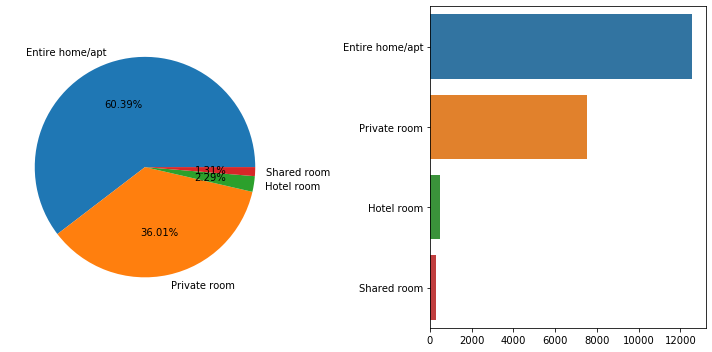

In [147]:
# value_counts返回每一个值的数量
room_type_data = listings_lite_df['room_type'].value_counts()
# 比例
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pie(room_type_data.values,autopct="%.2f%%",labels=room_type_data.index)
sns.barplot(y=room_type_data.index,x=room_type_data.values,ax=axes[1],orient='h')
# 自适应调整
plt.tight_layout()

## 房子地区分布情况

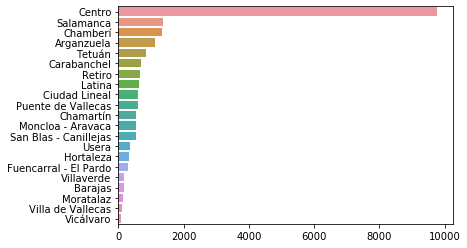

In [148]:
neighbourhood_group_cleansed = listings_lite_df['neighbourhood_group_cleansed'].value_counts()
sns.barplot(y=neighbourhood_group_cleansed.index,x=neighbourhood_group_cleansed.values,orient='h')

## 房间类型和社区对比分析（地区与房间类型的关系）

绘制每一个社区的房间类型占比，用柱形图堆叠的方式

In [149]:
# 先把数据弄出来
# 先按照社区分组，再按照房间类型分组
listings_lite_df.groupby(['neighbourhood_group_cleansed', 'room_type'])

In [150]:
# 上面看不出什么 size得到某个分组下面的数值
# stack堆叠 unstack 卸载  把room_type当做索引 剩下的当做值 这个时候发现Hotel room有NaN类型 
# 用0填充
# 求每一行的比例 
# 为了图好看些，我们排个序
listings_lite_df.groupby(['neighbourhood_group_cleansed', 'room_type'])\
    .size() \
    .unstack("room_type") \
    .fillna(0) \
    .apply(lambda row: row/row.sum(),axis=1) \
    .sort_values("Entire home/apt",ascending=True)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group_cleansed,,,,
Villaverde,0.168675,0.006024,0.753012,0.072289
Vicálvaro,0.184615,0.000000,0.784615,0.030769
Moratalaz,0.244094,0.015748,0.732283,0.007874
Barajas,0.260606,0.000000,0.727273,0.012121
San Blas - Canillejas,0.295802,0.000000,0.694656,0.009542
Villa de Vallecas,0.330097,0.000000,0.621359,0.048544
Ciudad Lineal,0.360522,0.003263,0.618271,0.017945
Usera,0.382271,0.036011,0.551247,0.030471
Carabanchel,0.383481,0.001475,0.594395,0.020649


In [151]:
neighbour_room_type = listings_lite_df.groupby(['neighbourhood_group_cleansed', 'room_type'])\
    .size() \
    .unstack("room_type") \
    .fillna(0) \
    .apply(lambda row: row/row.sum(),axis=1) \
    .sort_values("Entire home/apt",ascending=True)

<BarContainer object of 21 artists>

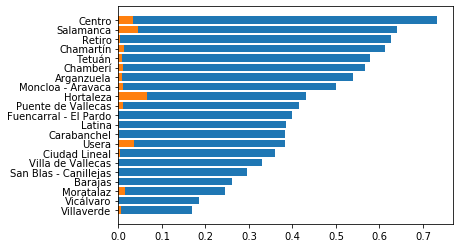

In [152]:
columns = neighbour_room_type.columns
plt.barh(neighbour_room_type.index,neighbour_room_type[columns[0]])
plt.barh(neighbour_room_type.index,neighbour_room_type[columns[1]])

In [153]:
# 上面黄色的部分是沿着底部绘制的，而不是右侧
help(plt.barh)
# left 绘制的时候距离左边要多少

Help on function barh in module matplotlib.pyplot:

barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
    Make a horizontal bar plot.
    
    The bars are positioned at *y* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The horizontal baseline
    is *left* (default 0).
    
    Each of *y*, *width*, *height*, and *left* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    y : scalar or array-like
        The y coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    width : scalar or array-like
        The width(s) of the bars.
    
    height : sequence of scalars, optional, default: 0.8
        The heights of the bars.
    
    left : sequence of scalars
        The x coordinates of the left sides of the bars (default: 0).
    
    align : {'center', 'edge'}, opt

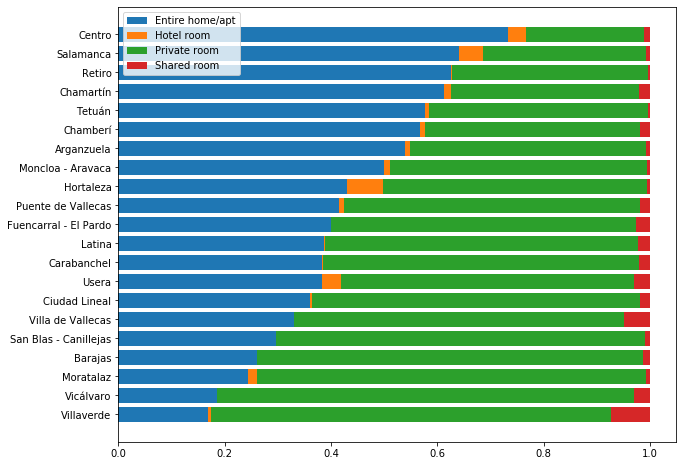

In [154]:
fig, axes = plt.subplots(figsize=(10, 8))  # 放大点
columns = neighbour_room_type.columns
plt.barh(neighbour_room_type.index, neighbour_room_type[columns[0]])
left = neighbour_room_type[columns[0]].copy()
plt.barh(neighbour_room_type.index, neighbour_room_type[columns[1]], left=left)
left += neighbour_room_type[columns[1]].copy()
plt.barh(neighbour_room_type.index, neighbour_room_type[columns[2]], left=left)
left += neighbour_room_type[columns[2]].copy()
plt.barh(neighbour_room_type.index, neighbour_room_type[columns[3]], left=left)
plt.legend(columns)  # 图例

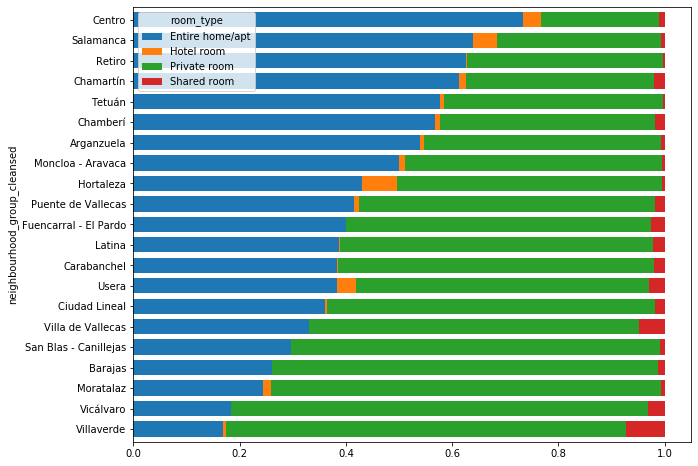

In [155]:
# 用pandas绘图
# kind绘图类型 stacked堆叠 
fig,axes = plt.subplots(figsize=(10,8))
neighbour_room_type.plot(kind="barh",width=0.75,stacked=True,ax=axes)

## 房东房源数量分析（每个房东有多少套房子）

host_id 根据ID分组

In [156]:
listings_lite_df.groupby("host_id").size()

host_id
5154         1
13660        1
31622        2
50106        1
53526        4
            ..
295609476    1
295823572    1
295847180    1
295894160    2
296084664    1
Length: 11969, dtype: int64

In [157]:
max(listings_lite_df.groupby("host_id").size())

231

In [158]:
n_listings_per_user = listings_lite_df.groupby("host_id").size()
listings_times = pd.cut(n_listings_per_user,bins=[1,2,3,5,1000],include_lowest=True,right=False,labels=['1','2','3-4','5+'])
listings_times

host_id
5154           1
13660          1
31622          2
50106          1
53526        3-4
            ... 
295609476      1
295823572      1
295847180      1
295894160      2
296084664      1
Length: 11969, dtype: category
Categories (4, object): [1 < 2 < 3-4 < 5+]

In [159]:
# 上面那个数据不能直接进行绘图 还要统计出现的次数
listings_times = pd.cut(n_listings_per_user,bins=[1,2,3,5,1000],include_lowest=True,right=False,labels=['1','2','3-4','5+']).value_counts()
listings_times 

1      9429
2      1338
3-4     661
5+      541
dtype: int64

([<matplotlib.patches.Wedge at 0x299ecee0548>,
 [Text(-0.8644582578135782, 0.6802293146416973, '1'),
  Text(0.6107220900430627, -0.9148871672143146, '2'),
  Text(0.9868763999443085, -0.4858754688528341, '3-4'),
  Text(1.0889283783324408, -0.15567590328076109, '5+')],
 [Text(-0.47152268608013354, 0.37103417162274394, '78.78%'),
  Text(0.3331211400234887, -0.4990293639350806, '11.18%'),
  Text(0.5382962181514409, -0.26502298301063676, '5.52%'),
  Text(0.5939609336358768, -0.08491412906223332, '4.52%')])

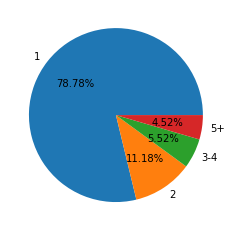

In [160]:
plt.pie(listings_times,autopct="%.2f%%",labels=listings_times.index)

## 评论数量与时间分析

### 处理数据

In [161]:
reviews = pd.read_csv("./data/madrid-airbnb-data/reviews_detailed.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...


In [162]:
reviews.info() #object 实际上就是字符串类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732710 entries, 0 to 732709
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     732710 non-null  int64 
 1   id             732710 non-null  int64 
 2   date           732710 non-null  object
 3   reviewer_id    732710 non-null  int64 
 4   reviewer_name  732709 non-null  object
 5   comments       732410 non-null  object
dtypes: int64(3), object(3)
memory usage: 33.5+ MB


In [163]:
# parse_dates将那些列转化为date类型
reviews = pd.read_csv("./data/madrid-airbnb-data/reviews_detailed.csv",parse_dates=['date'])
reviews.info() #就不需要用pd的to_datatime转化了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732710 entries, 0 to 732709
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     732710 non-null  int64         
 1   id             732710 non-null  int64         
 2   date           732710 non-null  datetime64[ns]
 3   reviewer_id    732710 non-null  int64         
 4   reviewer_name  732709 non-null  object        
 5   comments       732410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 33.5+ MB


### 增加几列

In [164]:
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month

In [165]:
reviews.groupby("year").size()

year
2010        32
2011       375
2012      1971
2013      5800
2014     15551
2015     38606
2016     77220
2017    148083
2018    226054
2019    219018
dtype: int64

### 每年的评论数量变化

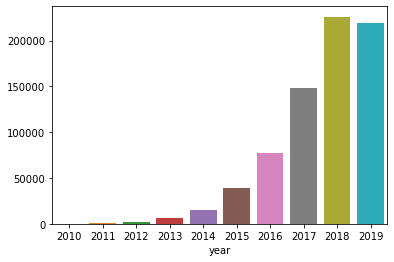

In [166]:
n_reviews_year = reviews.groupby('year').size()
sns.barplot(x=n_reviews_year.index,y=n_reviews_year.values)
# 2019年评论并不是少了，而是11、12月的评论数据缺失

### 每个月的评论数量变化

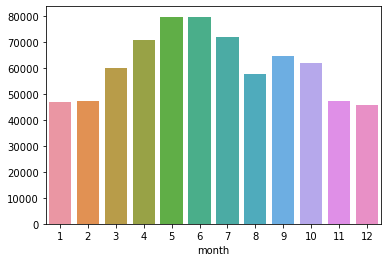

In [167]:
n_reviews_month = reviews.groupby('month').size()
sns.barplot(x=n_reviews_month.index,y=n_reviews_month.values)
# 出售的高峰期，评论数量越多

## 评论数量与时间综合分析

综合来看下，每年中，每个月的评论次数的情况。如果还用柱状图会比较拥挤，所以这里用折线图+条形图



In [168]:
# 按照年月分组
reviews.groupby(['year','month']).size()

year  month
2010  3            2
      4            3
      5            5
      6            3
      7            1
               ...  
2019  5        31189
      6        34079
      7        27547
      8        22139
      9        11324
Length: 114, dtype: int64

In [169]:
reviews.groupby(['year','month']).size().unstack('month').fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,0.0,0.0,2.0,3.0,5.0,3.0,1.0,0.0,5.0,5.0,6.0,2.0
2011,2.0,5.0,6.0,4.0,24.0,35.0,51.0,32.0,48.0,74.0,50.0,44.0
2012,61.0,54.0,78.0,133.0,195.0,172.0,179.0,165.0,233.0,296.0,225.0,180.0
2013,205.0,202.0,301.0,434.0,551.0,536.0,529.0,408.0,695.0,764.0,602.0,573.0
2014,680.0,571.0,882.0,1088.0,1232.0,1219.0,1316.0,1173.0,1924.0,2137.0,1626.0,1703.0
2015,1605.0,1644.0,2272.0,2907.0,3643.0,3339.0,3317.0,2860.0,4358.0,5062.0,3813.0,3786.0
2016,3703.0,4123.0,4879.0,5742.0,7349.0,6392.0,6362.0,5618.0,8205.0,10142.0,7686.0,7019.0
2017,8022.0,8083.0,9565.0,13141.0,14522.0,14541.0,12348.0,9955.0,15809.0,16984.0,12524.0,12589.0
2018,13048.0,13431.0,15546.0,19811.0,21002.0,19174.0,20067.0,15133.0,21985.0,26474.0,20616.0,19767.0


In [170]:
year_month_reviews = reviews.groupby(['year','month']).size().unstack('month').fillna(0)

In [171]:
for index in year_month_reviews.index:
    series = year_month_reviews.loc[index]
    print(series)
    break
# 2010年1月到12月的值

month
1     0.0
2     0.0
3     2.0
4     3.0
5     5.0
6     3.0
7     1.0
8     0.0
9     5.0
10    5.0
11    6.0
12    2.0
Name: 2010, dtype: float64


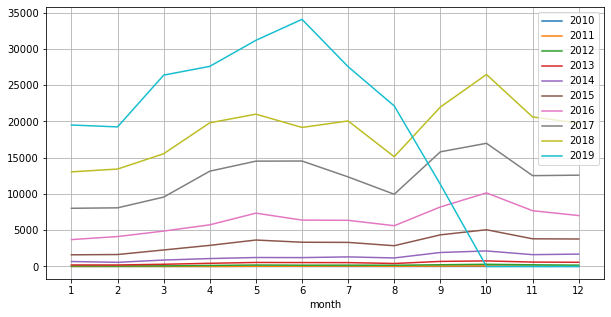

In [172]:
#  X轴是月。年画线条
fig,ax1 = plt.subplots(1,1,figsize=(10,5))
# for循环所有索引
for index in year_month_reviews.index:
    series = year_month_reviews.loc[index]
    sns.lineplot(x=series.index,y=series.values,ax=ax1)
ax1.legend(labels=year_month_reviews.index)
ax1.grid()
x=ax1.set_xticks(list(range(1,13))) #X轴没有把所有的月份打印出来

# 房屋价格预测——建模


In [173]:
# calendar数据集里面包含价格字段， 但是少了
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,weekday,month
0,336834,2019-09-19,f,63.0,63.0,5,250,4,9
1,6369,2019-09-19,f,70.0,70.0,1,365,4,9
2,6369,2019-09-20,f,75.0,75.0,1,365,5,9
3,6369,2019-09-21,f,75.0,75.0,1,365,6,9
4,6369,2019-09-22,t,70.0,70.0,1,365,7,9


In [174]:
# 这里我们用listings_detailed 这个数据集 里面有很多对价格有影响的因素
listings_detailed.columns.values.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


## 提取与价格有关的字段


In [175]:
'host_is_superhost', # 是否是超级房东，就相当于天猫优质商家，价格会更高点
'host_identity_verified', # 房价是否经过认证
'neighbourhood_group_cleansed', #社区
'latitude', # 经度
'longitude', #纬度
'property_type',#房间类型
'room_type',#私有还是公有空间
'accommodates',#容纳人数
'bathrooms',#浴室有多少个
'bedrooms',#卧室多少个
'cleaning_fee',# 小费
'minimum_nights',#最少租多少晚
'maximum_nights',#最多租多少晚
'availability_90',#90天内多少天可用，90天内80天可用，说明没有租出去
'number_of_reviews',# 评论数量，越多越火爆，价格可以上涨
'review_scores_rating',# 评论评分
'is_business_travel_ready', #是否为business_travel 做了准备 添加服务
'n_amenities',#设施数量
'price',#价格

('price',)

In [176]:
ml_listings=listings_detailed[listings_detailed['price']<300][[ #小于300美元以下的 取一些有意义的数据
    'host_is_superhost', # 是否是超级房东，就相当于天猫优质商家，价格会更高点
    'host_identity_verified', # 房价是否经过认证
    'neighbourhood_group_cleansed', #社区
    'latitude', # 经度
    'longitude', #纬度
    'property_type',#房间类型
    'room_type',#私有还是公有空间
    'accommodates',#容纳人数
    'bathrooms',#浴室有多少个
    'bedrooms',#卧室多少个
    'cleaning_fee',# 小费
    'minimum_nights',#最少租多少晚
    'maximum_nights',#最多租多少晚
    'availability_90',#90天内多少天可用，90天内80天可用，说明没有租出去
    'number_of_reviews',# 评论数量，越多越火爆，价格可以上涨
 #   'review_scores_rating',# 评论评分 #这一条有5k条数据用不了 所以不考虑这一条数据了
    'is_business_travel_ready', #是否为business_travel 做了准备 添加服务
    'n_amenities',#设施数量
    'price',#价格
]]

In [177]:
ml_listings.info()
# 能看到此时有空值，但是空值不多我们删去，按照行的方式

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19305 entries, 0 to 20836
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             19290 non-null  object 
 1   host_identity_verified        19290 non-null  object 
 2   neighbourhood_group_cleansed  19305 non-null  object 
 3   latitude                      19305 non-null  float64
 4   longitude                     19305 non-null  float64
 5   property_type                 19305 non-null  object 
 6   room_type                     19305 non-null  object 
 7   accommodates                  19305 non-null  int64  
 8   bathrooms                     19296 non-null  float64
 9   bedrooms                      19296 non-null  float64
 10  cleaning_fee                  19305 non-null  float32
 11  minimum_nights                19305 non-null  int64  
 12  maximum_nights                19305 non-null  int64  
 13  a

In [178]:
# 删除特征值
ml_listings.dropna(axis=0,inplace=True)
ml_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19273 entries, 0 to 20836
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             19273 non-null  object 
 1   host_identity_verified        19273 non-null  object 
 2   neighbourhood_group_cleansed  19273 non-null  object 
 3   latitude                      19273 non-null  float64
 4   longitude                     19273 non-null  float64
 5   property_type                 19273 non-null  object 
 6   room_type                     19273 non-null  object 
 7   accommodates                  19273 non-null  int64  
 8   bathrooms                     19273 non-null  float64
 9   bedrooms                      19273 non-null  float64
 10  cleaning_fee                  19273 non-null  float32
 11  minimum_nights                19273 non-null  int64  
 12  maximum_nights                19273 non-null  int64  
 13  a

In [179]:
# 分割特征值和目标值
features=ml_listings.drop(columns=['price'])
targets=ml_listings['price']

In [180]:
# 分割完特征值和目标值之后不能够直接放到算法里面建模
# 因为特征值
features.head()
# 数据类型复杂，有字符串类型，数字类型，放到算法之前是必须要处于数值类型  非数值类型需要转换

,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,cleaning_fee,minimum_nights,maximum_nights,availability_90,number_of_reviews,is_business_travel_ready,n_amenities
0,f,f,Chamartín,40.45628,-3.67763,Apartment,Private room,2,1.0,1.0,5.0,1,365,53,65,f,16
1,f,t,Latina,40.40341,-3.74084,Apartment,Private room,1,1.0,1.0,0.0,4,40,0,33,f,31
2,f,t,Centro,40.42202,-3.70395,Apartment,Entire home/apt,3,1.0,0.0,30.0,5,730,79,2,f,32
3,t,f,Centro,40.41995,-3.69764,Apartment,Entire home/apt,4,1.5,2.0,0.0,3,1125,48,64,f,18
4,f,t,Arganzuela,40.38985,-3.69011,House,Private room,1,1.0,1.0,15.0,2,365,70,136,f,16


## 处理特征值

### 针对字符串类型(离散型数据)进行one-hot类型编码

比如只有f、t 转化成一个为1 一个为0

字符串类型可以看成离散型数据

In [181]:
disperse_columns=[
    'host_is_superhost', # 是否是超级房东，就相当于天猫优质商家，价格会更高点
    'host_identity_verified', # 房价是否经过认证
    'neighbourhood_group_cleansed', #社区
    'property_type',#房间类型
    'room_type',#私有还是公有空间
    'is_business_travel_ready'#是否为business_travel 做了准备 添加服务  
]
# 获取离散型特征
disperse_features=features[disperse_columns]

In [182]:
# 进行one-hot类型编码
pd.get_dummies(disperse_features)

,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Arganzuela,neighbourhood_group_cleansed_Barajas,neighbourhood_group_cleansed_Carabanchel,neighbourhood_group_cleansed_Centro,neighbourhood_group_cleansed_Chamartín,neighbourhood_group_cleansed_Chamberí,...,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_business_travel_ready_f
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
20833,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
20834,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
20835,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [183]:
disperse_features=pd.get_dummies(disperse_features)

### 对连续型数据进行标准化

(因为特征值之间相差并不是很大，所以标准化可能对预测结果影响很大)

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
continuouse_features=features.drop(columns=disperse_columns) #把离散型的数据删掉就剩下连续型的了
scaler = StandardScaler()
continuouse_features=scaler.fit_transform(continuouse_features)
continuouse_features

array([[ 1.67418935,  0.6777749 , -0.63942081, ...,  0.53352263,
         0.43395151, -0.48711703],
       [-0.77139864, -1.71757057, -1.15800175, ..., -1.19553609,
        -0.07162695,  0.86348381],
       [ 0.08943723, -0.31962255, -0.12083988, ...,  1.38174012,
        -0.56140608,  0.95352387],
       ...,
       [ 0.0801859 , -0.29726448,  0.39774106, ...,  1.18599762,
        -0.59300473, -0.03691675],
       [-0.51467435, -0.21048484, -0.63942081, ..., -0.7388036 ,
        -0.59300473, -0.93731731],
       [-0.01649045, -0.04336771, -0.63942081, ..., -0.96716984,
        -0.59300473,  0.05312331]])

### 对处理后的特征进行组合

In [186]:
# 使用np进行堆叠
feature_array=np.hstack([disperse_features,continuouse_features])
feature_array

array([[ 1.        ,  0.        ,  1.        , ...,  0.53352263,
         0.43395151, -0.48711703],
       [ 1.        ,  0.        ,  0.        , ..., -1.19553609,
        -0.07162695,  0.86348381],
       [ 1.        ,  0.        ,  0.        , ...,  1.38174012,
        -0.56140608,  0.95352387],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  1.18599762,
        -0.59300473, -0.03691675],
       [ 1.        ,  0.        ,  0.        , ..., -0.7388036 ,
        -0.59300473, -0.93731731],
       [ 1.        ,  0.        ,  0.        , ..., -0.96716984,
        -0.59300473,  0.05312331]])

## 建模

切割完成后不太好直接放进算法处理，还需要对这之后的数据进行组合。水平方向合在一起。列数增加，行数不变。

In [187]:
from sklearn.model_selection import train_test_split
# 切分数据
X_train,X_test,y_train,y_test = train_test_split(feature_array,targets,test_size=0.25)
from sklearn.linear_model import LinearRegression
#调用线性回归算法
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
# 评分 调用绝对误差，均方误差   r2也是一个评判标准 这个标准是越解决1越好
from sklearn.metrics import mean_absolute_error,r2_score

In [188]:
help(mean_absolute_error)

Help on function mean_absolute_error in module sklearn.metrics._regression:

mean_absolute_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    Mean absolute error regression loss
    
    Read more in the :ref:`User Guide <mean_absolute_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average']
        or array-like of shape (n_outputs)
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        'uniform_average' :
            

In [191]:
print("平均误差：",mean_absolute_error(y_test,y_predict))
print("R2评分：",r2_score(y_test,y_predict))
# 评分比较低
#用一个决策树没有这么好，随机森林会好些

平均误差： 26.5552849073978
R2评分： 0.37142154421056484


In [193]:
# 随机森林不仅可以用决策树，还可以用于线性回归
from sklearn.ensemble import RandomForestRegressor

In [194]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
print("平均误差：",mean_absolute_error(y_test,y_predict))
print("R2评分：",r2_score(y_test,y_predict))
# 评分上升了，误差在20美元左右
# 因为这些数据的属性，对价格的影响因素比较小，因为价格容易受房东主观因素影响

平均误差： 20.273612782735007
R2评分： 0.5944989534817263


# 评论数量预测

之前绘图的时候把没有的数据用0填充的，这次我们预测10、11、12月的评论数量

In [196]:
year_month_reviews
# 这个数据集看起来好看，但是fit起来不好用

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,0.0,0.0,2.0,3.0,5.0,3.0,1.0,0.0,5.0,5.0,6.0,2.0
2011,2.0,5.0,6.0,4.0,24.0,35.0,51.0,32.0,48.0,74.0,50.0,44.0
2012,61.0,54.0,78.0,133.0,195.0,172.0,179.0,165.0,233.0,296.0,225.0,180.0
2013,205.0,202.0,301.0,434.0,551.0,536.0,529.0,408.0,695.0,764.0,602.0,573.0
2014,680.0,571.0,882.0,1088.0,1232.0,1219.0,1316.0,1173.0,1924.0,2137.0,1626.0,1703.0
2015,1605.0,1644.0,2272.0,2907.0,3643.0,3339.0,3317.0,2860.0,4358.0,5062.0,3813.0,3786.0
2016,3703.0,4123.0,4879.0,5742.0,7349.0,6392.0,6362.0,5618.0,8205.0,10142.0,7686.0,7019.0
2017,8022.0,8083.0,9565.0,13141.0,14522.0,14541.0,12348.0,9955.0,15809.0,16984.0,12524.0,12589.0
2018,13048.0,13431.0,15546.0,19811.0,21002.0,19174.0,20067.0,15133.0,21985.0,26474.0,20616.0,19767.0


In [197]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...,2010,3
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...,2010,3
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...,2010,4
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...,2010,4
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...,2010,4


In [201]:
reviews.groupby(['year','month']).size()

year  month
2010  3            2
      4            3
      5            5
      6            3
      7            1
               ...  
2019  5        31189
      6        34079
      7        27547
      8        22139
      9        11324
Length: 114, dtype: int64

In [204]:
# 年和月也要当特征值才行
reviews.groupby(['year','month']).size().reset_index().rename(columns={0:"count"})

,year,month,count
0,2010,3,2
1,2010,4,3
2,2010,5,5
3,2010,6,3
4,2010,7,1
...,...,...,...
109,2019,5,31189
110,2019,6,34079
111,2019,7,27547
112,2019,8,22139


In [207]:
ym_reviews=reviews.groupby(['year','month']).size().reset_index().rename(columns={0:"count"})
features = ym_reviews[['year','month']]
targets = ym_reviews['count']

X_train,X_test,y_train,y_test = train_test_split(features,targets,test_size=0.25)
regressor=RandomForestRegressor(n_estimators=100) #建100个数
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
print("平均误差：",mean_absolute_error(y_test,y_predict))
print("R2评分：",r2_score(y_test,y_predict))

平均误差： 972.4124137931035
R2评分： 0.8954031145542651


In [214]:
# 如果需要预测10月 11 12 是不是就不用切分直接把全部数据拿来用
regressor=RandomForestRegressor(n_estimators=100) #建100个数
regressor.fit(features,targets)
y_predict = regressor.predict([
    [2019,10],
    [2019,11],
    [2019,12]
])
y_predict

array([18155.02, 18233.8 , 17931.56])

# 预测结果可视化

将刚才预测的结果放到DataFrame中

In [215]:
ym_reviews.head()

,year,month,count
0,2010,3,2
1,2010,4,3
2,2010,5,5
3,2010,6,3
4,2010,7,1


In [223]:
# 数据前面要加上年，月，
# 简便得方式就是把结果转化为DataFrame 然后两个DataFrame堆叠
predict_reviews = pd.DataFrame([[2019,10,x] for x in y_predict])
predict_reviews

,0,1,2
0,2019,10,18155.02
1,2019,10,18233.80
2,2019,10,17931.56


In [224]:
# enumerate 返回两个数据，当前的索引，当前的值
predict_reviews = pd.DataFrame([[2019,10+index,x] for index,x in enumerate(y_predict)],columns=['year','month','count'])
predict_reviews

,year,month,count
0,2019,10,18155.02
1,2019,11,18233.80
2,2019,12,17931.56


In [225]:
pd.concat([ym_reviews,predict_reviews])

,year,month,count
0,2010,3,2.00
1,2010,4,3.00
2,2010,5,5.00
3,2010,6,3.00
4,2010,7,1.00
...,...,...,...
112,2019,8,22139.00
113,2019,9,11324.00
0,2019,10,18155.02
1,2019,11,18233.80


In [228]:
# 上面索引有些问题
pd.concat([ym_reviews,predict_reviews]).reset_index()
# 下面又多了个索引 待会绘图的时候能改

,index,year,month,count
0,0,2010,3,2.00
1,1,2010,4,3.00
2,2,2010,5,5.00
3,3,2010,6,3.00
4,4,2010,7,1.00
...,...,...,...,...
112,112,2019,8,22139.00
113,113,2019,9,11324.00
114,0,2019,10,18155.02
115,1,2019,11,18233.80


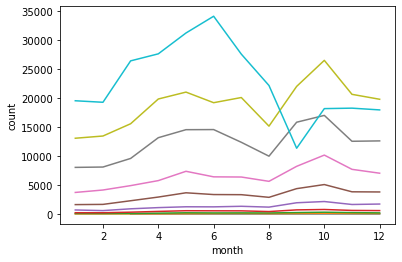

In [232]:
final_reviews=pd.concat([ym_reviews,predict_reviews]).reset_index()
years= final_reviews['year'].unique()
for year in years:
    df = final_reviews[final_reviews['year']==year]
    sns.lineplot(x='month',y='count',data=df)

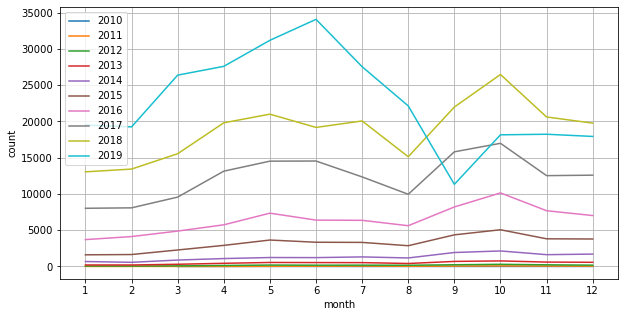

In [233]:
# 变得好看些
final_reviews=pd.concat([ym_reviews,predict_reviews]).reset_index()
years= final_reviews['year'].unique()
fig,ax1 = plt.subplots(1,1,figsize=(10,5))
for year in years:
    df = final_reviews[final_reviews['year']==year]
    sns.lineplot(x='month',y='count',data=df,ax=ax1)
    
ax1.legend(labels=year_month_reviews.index)
ax1.grid()
x=ax1.set_xticks(list(range(1,13))) #X轴没有把所有的月份打印出来